# ANALISIS PICOS 2

In [13]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_widths(signal, level):
    widths = []
    i = 0
    length = len(signal)
    while i < length-1:
        peak_width = 0
        dp = signal[i]
        while dp < level and i < length-1:
            peak_width += 1
            i += 1
            dp = signal[i]
        if peak_width > 0:
            widths.append(peak_width)
        i += 1
    return np.array(widths)

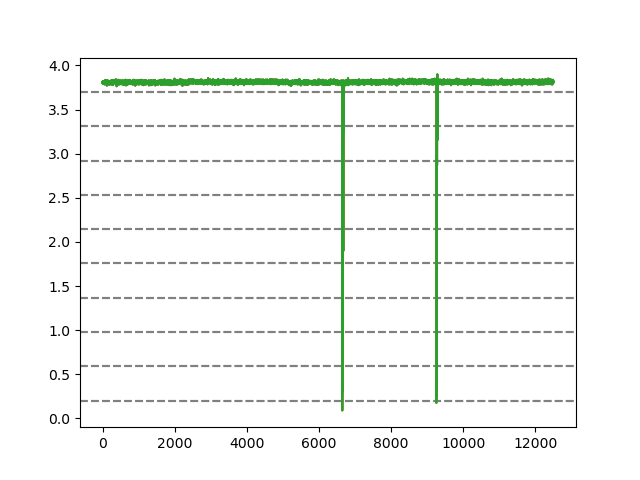

In [12]:

common_path = "/home/tomi/Documents/academicos/facultad/tesis/git/data/20-10-2023/osc_screens_photon_width"
data = np.load(f"{common_path}/{str(10).zfill(4)}.npy")

In [22]:

common_path = "/home/tomi/Documents/academicos/facultad/tesis/git/data/20-10-2023/osc_screens_photon_width"
levels = np.linspace(4.0, 0.1, 100)
widths_total = []
for level in levels:
    widths_level = np.array([])
    for num in range(1000):
        data = np.load(f"{common_path}/{str(num).zfill(4)}.npy")
        widths = get_widths(data, level)
        widths_level = np.hstack((widths_level, widths))
    widths_total.append(widths_level)
    

In [36]:
np.save("/home/tomi/Documents/academicos/facultad/tesis/git/calibration/peak_width/all_widths_image_0.1_4.0", widths_total)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.

In [34]:
bins = np.arange(50)
image = np.zeros(shape=(len(widths_total), len(bins)-1))
for i, widths_level in enumerate(widths_total):
    freq, bin_edges = np.histogram(widths_level, density=True, bins=bins)
    image[i, :] = freq

/usr/lib64/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


In [37]:

np.save("/home/tomi/Documents/academicos/facultad/tesis/git/calibration/peak_width/all_widths_image_0.1_4.0", image)

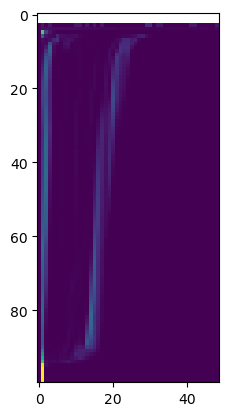

In [35]:
plt.imshow(image)
plt.show()

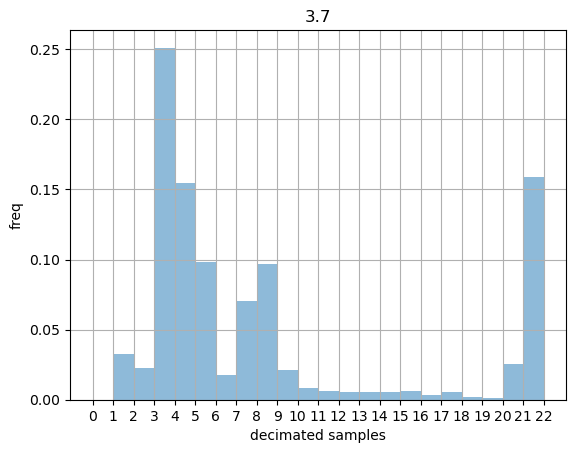

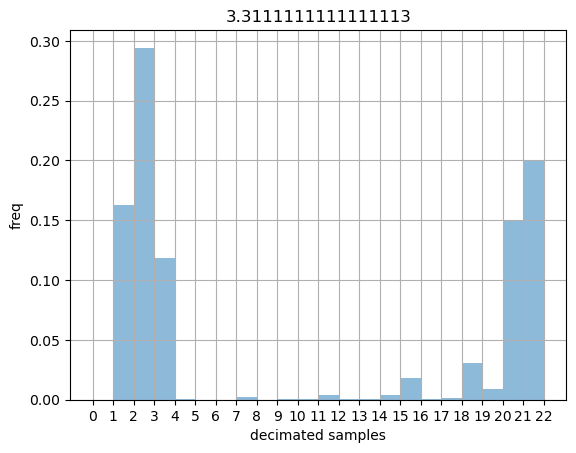

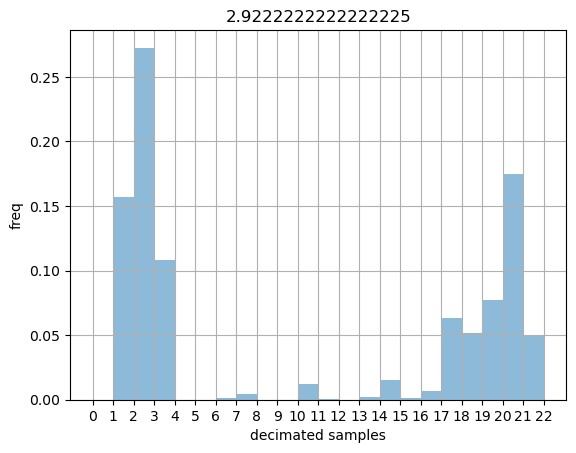

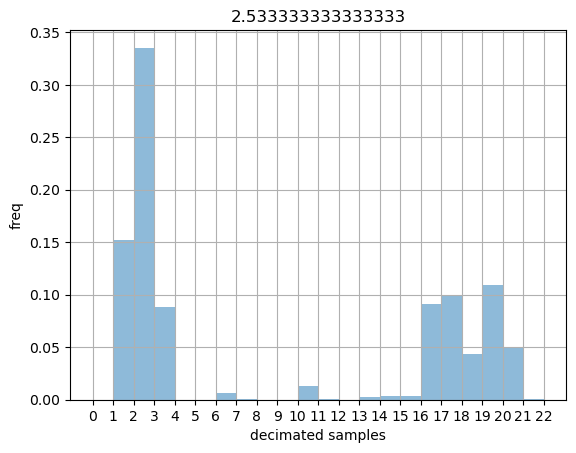

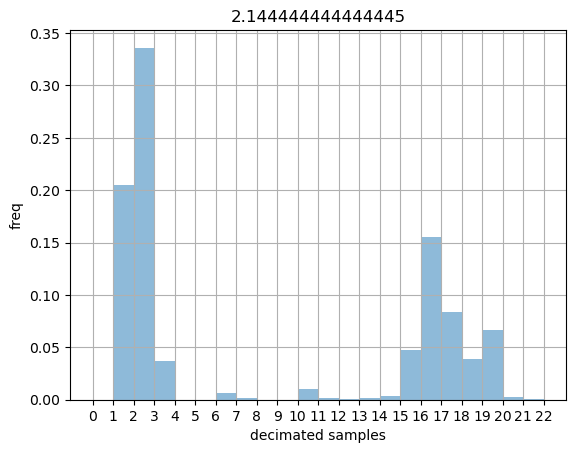

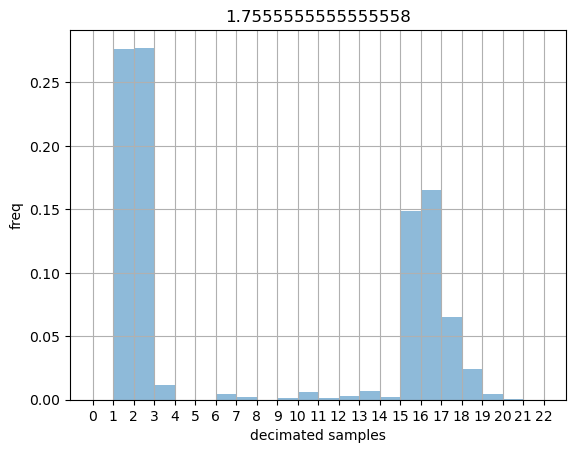

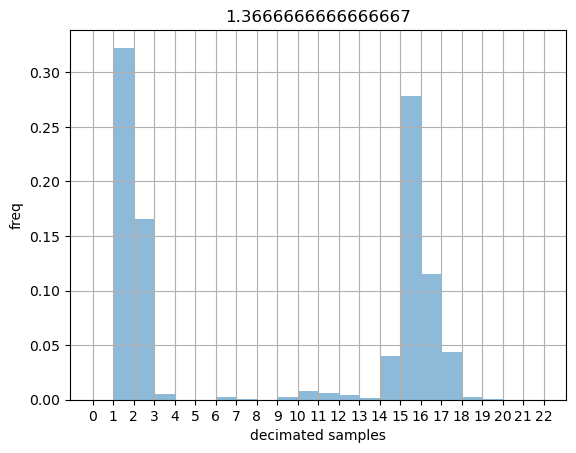

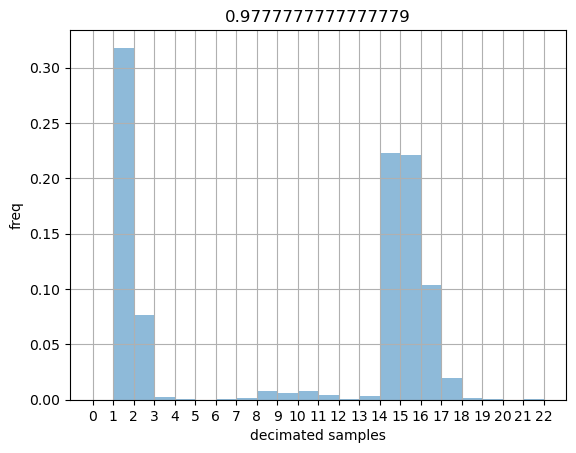

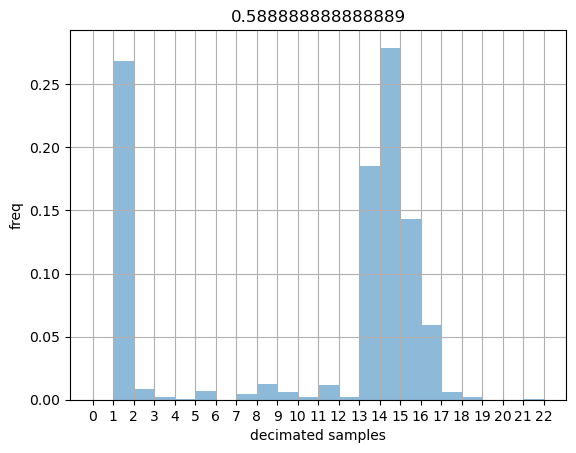

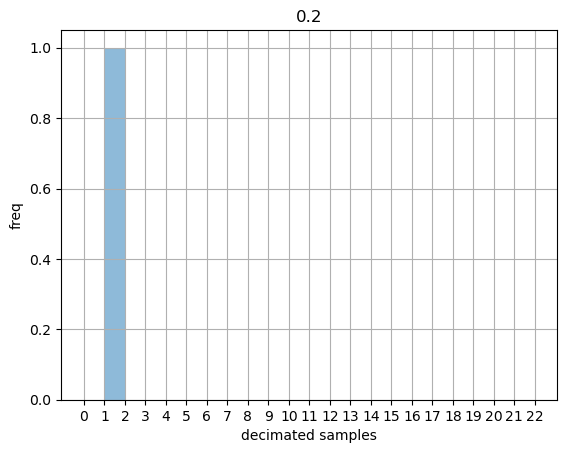

In [21]:
for level, widths_level in zip(levels, widths_total):
    bins = np.arange(23)
    freq, bin_edges = np.histogram(widths_level, density=True, bins=bins)
    plt.close('all')
    plt.title(level)
    plt.stairs(freq, bin_edges, fill=True, alpha=0.5,
                   color="C0")
    plt.xlabel("decimated samples")
    plt.ylabel("freq")
    plt.xticks(bin_edges)
    plt.grid()
    plt.show()

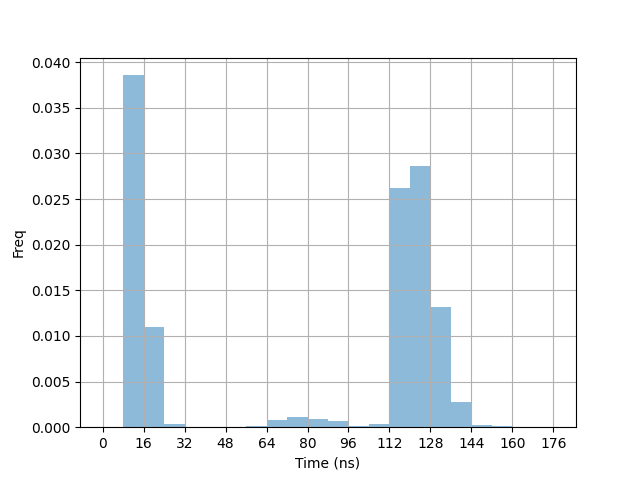

In [40]:

witdths_time = widths_total/125e6 * 1e9
bins = np.arange(23)/125e6 * 1e9
freq, bin_edges = np.histogram(witdths_time, density=True, bins=bins)
plt.close('all')
plt.stairs(freq, bin_edges, fill=True, alpha=0.5,
               color="C0")
plt.xlabel("Time (ns)")
plt.ylabel("Freq")
plt.xticks(bin_edges[::2])
plt.grid()
plt.show()